In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from scipy import stats
import pylab
from matplotlib import cm

In [ ]:
mic = pd.read_csv('mic.txt', sep = ' ').drop(columns = ["'n'"])
mic.head()

,'y','x1','x2','x3'
0,2.1,20,1.0,20.0
1,2.0,21,1.0,21.0
2,2.4,27,1.0,27.0
3,2.0,26,1.8,46.8
4,2.1,27,2.0,54.0


In [ ]:
mic.rename(columns={"'y'": "log(cont)", "'x1'": "temperatura", "'x2'": "medio", "'x3'" : "x1x2"}, inplace = True)
mic.head()

,log(cont),temperatura,medio,x1x2
0,2.1,20,1.0,20.0
1,2.0,21,1.0,21.0
2,2.4,27,1.0,27.0
3,2.0,26,1.8,46.8
4,2.1,27,2.0,54.0


In [ ]:
X = mic[['temperatura', 'medio', 'x1x2']]
y = mic['log(cont)']

X_cons = sm.add_constant(X)

In [ ]:
lin_reg = sm.GLS(y, X_cons).fit()

lin_reg.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              log(cont)   R-squared:                       0.891
Model:                            GLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     29.89
Date:                Sun, 14 May 2023   Prob (F-statistic):           1.38e-05
Time:                        04:23:29   Log-Likelihood:                -11.169
No. Observations:                  15   AIC:                             30.34
Df Residuals:                      11   BIC:                             33.17
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.5514      1.210      2.109      0.059      -0.111       5.214
temperatura    -0.0551      0.037     -1.492      0.164      -0.136       0.026
medio          -0.0309      0.618     -0.050      0.961      -1.391       1.329
x1x2            0.0369      0.018      2.069      0.063      -0.002       0.076
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   1.558
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.733
Skew:                          -0.231   Prob(JB):                        0.693
Kurtosis:                       2.020   Cond. No.                         686.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Del resumen anterior podemos ver que el valor de la $R^2$ ajustada es $0.86$, el cual es un valor decente. Cabe destacar que estamos considerando la $R^2# ajustada y no la normal debido a que estamos usando regresión multiple por lo que queremos tomar en cuenta el número de regresores que estamos tomando, así como el número de observaciones.


Por otro lado, del $p-value$ de la estadística $F$ es menor que $0.05$ por lo que afirmarmos que existe al menos una variable significativa.

Calculamos el error estandar

$$SE = \sqrt{\frac{SSR}{n-k-1}}$$

In [ ]:
SSR = sum(lin_reg.resid**2)

SE = np.sqrt(SSR / (mic.shape[0] - mic.shape[1] - 1))

print(f'SE = {SE}')


SE = 0.6239842393442157


Como podemos ver, al distancia entre los datos observados y los estimados es pequeña.

A primera vista parece un buen modelo. Vamos a proceder con la verificación de los coeficientes.

#Verificación de los Coeficientes


In [ ]:
#precision de los coeficientes
lin_reg.bse

const          1.209769
temperatura    0.036940
medio          0.617877
x1x2           0.017828
dtype: float64

In [ ]:
#prueba T para cada variable
lin_reg.pvalues

const          0.058681
temperatura    0.163928
medio          0.960981
x1x2           0.062884
dtype: float64

Observamos que la variable menos significativa es $x_1x_2$, por lo que una idea es crear otro modelo eliminando dicha variable y ver su desempeño.


Veamos los intervalos del $95\%$ confianza de los coeficientes

In [ ]:
lin_reg.conf_int()

,0,1
const,-0.111308,5.214060
temperatura,-0.136403,0.026207
medio,-1.390861,1.329013
x1x2,-0.002354,0.076126


Observamos que el intervalo de la última variable $x_1x_2$ tiene una longitud muy pequeña, además dicho intervalo continene al cero, por lo que seguimos sosteniendo la hipótesis de que dicho regresor no es significativo.


A partir de este momento vamos a realizar otro modelo descartando $x_1x_2$, haremos un breve anális de él y despues procederemos a hacer el análisis de residuales de ambos modelos


In [ ]:
#tomamos solo las dos primeras variables
X_2var = X[['temperatura', 'medio']]

#agregamos la columna de unos
X_2var_cons = sm.add_constant(X_2var)

#ajustamos el modelos
lin_reg_2var = sm.GLS(y, X_2var).fit()

lin_reg_2var.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 GLS Regression Results                                
=======================================================================================
Dep. Variable:              log(cont)   R-squared (uncentered):                   0.969
Model:                            GLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              205.2
Date:                Sun, 14 May 2023   Prob (F-statistic):                    1.47e-10
Time:                        04:23:29   Log-Likelihood:                         -13.838
No. Observations:                  15   AIC:                                      31.68
Df Residuals:                      13   BIC:                                      33.09
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperatura     0.0202      0.011      1.812      0.093      -0.004       0.044
medio           1.2395      0.144      8.637      0.000       0.929       1.550
==============================================================================
Omnibus:                        2.975   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.226   Jarque-Bera (JB):                1.252
Skew:                          -0.271   Prob(JB):                        0.535
Kurtosis:                       1.692   Cond. No.                         25.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observamos que el valor de $R^2$ ajustado incremento significativamente a $0.96$. Además, el $p-value$ de la estadística $F$ sigue siendo menor que $0.05$ por lo que existe al menos una variable significativa.


Calculemos el error estandar

In [ ]:
SSR_2var = sum(lin_reg_2var.resid**2)

SE_2var = np.sqrt(SSR_2var / (mic.shape[0] - 2 - 1))

print(f'SE = {SE_2var}')

SE = 0.6805463256899863


El error estandar al considerar sólo la temperatura y el medio sigue siendo de la misma magnitud que el del modelo con todas las variables

In [ ]:
#precision de los coeficientes
lin_reg_2var.bse

temperatura    0.01113
medio          0.14351
dtype: float64

In [ ]:
#vemos que todas las variables sean significativas
lin_reg_2var.pvalues

temperatura    9.313401e-02
medio          9.572412e-07
dtype: float64

In [ ]:
#intervalos de confianza
lin_reg_2var.conf_int()

,0,1
temperatura,-0.003877,0.044213
medio,0.929461,1.549532


Vemos que todas las variables son significativas, por lo que todo parece indicar que el modelos con dos regresores es mejor que el modelo al considerar todas las variables. Ahora sí continuamos con el análisis de residuales para ambas regresiones


#Análisis de residuales

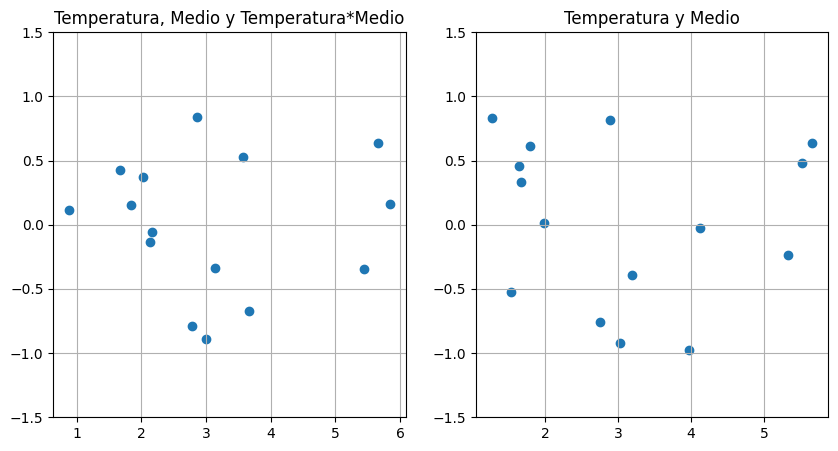

In [ ]:
#Grafico de Tukey-Anscombe para la homocedasticidad 

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10, 5)

models = np.array([lin_reg, lin_reg_2var])

labels = ["Temperatura, Medio y Temperatura*Medio", "Temperatura y Medio"]

for i in range(0,2):
  ax[i].set_title(labels[i])
  ax[i].grid()
  ax[i].set_ylim([-1.5,1.5])
  ax[i].scatter(np.matmul(models[i].model.exog, models[i].params), models[i].resid);

In [ ]:
#test de Breusch-Pagan
i = 1
alpha = 0.05
for model in models:
    print("*** Modelo", i, "***")
    i += 1
    results = sm.stats.diagnostic.het_goldfeldquandt(model.model.endog, model.model.exog, alternative="two-sided")
    p_val = results[1]
    print(f"p_val = {p_val:.3f}")
    if p_val <= alpha:
        print("Rechazamos H_0: la varianza no es constante\n")
    else:
        print("No rechazamos H_0: la varianza es constante\n")

*** Modelo 1 ***
p_val = 0.104
No rechazamos H_0: la varianza es constante

*** Modelo 2 ***
p_val = 0.595
No rechazamos H_0: la varianza es constante



La prueba de Bresuch-Pagan afirma que la varianza es constante. Además, de manera gráfica los puntos se comportan de manera aleatoria, por lo que podemos confirmar que hay homocedasticidad

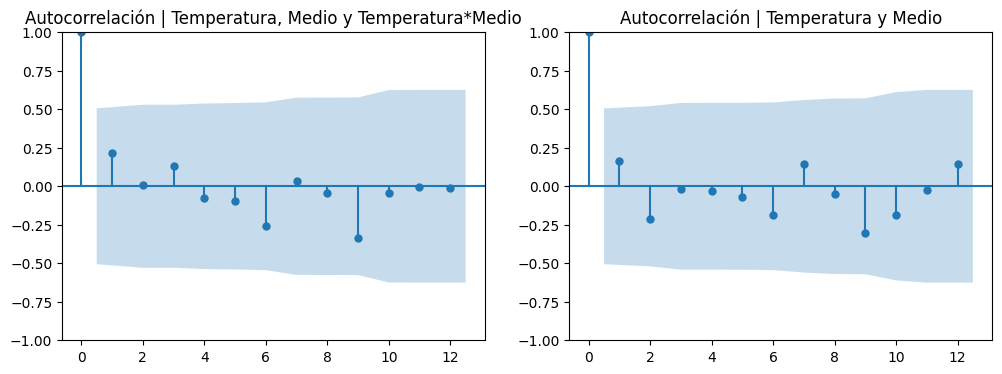

In [ ]:
#Veamos que no hay autocorrelacion mirando el autocorrelograma 
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 4)

for i in range(0,2):
  plot_acf(models[i].resid, ax=ax[i], title=f"Autocorrelación | {labels[i]}")
  

Graficamente podemos ver que no hay autocorrelación de los errores dado que ninguna barra sale del intervalo de confianza. 

Por otro lado, el modelo de las tres varialbes toma un valor de $1.558$ en la prueba de Durbin Watson, mientras que el modelo de la temperatura y el medio toma un valor de $1.591$. Sabemos que para tamaños de muestra moderados (aprox 50 datos) la estadística debe de tomar un valor dentro del intervalo $(1.5, 2.5)$. Hay que recordar que estamos trabajando con 15 datos, lo cual es menor que 50, pero debido a que el autocorrelograma mostró que no hay correlación, entonces concluimos que se cumple el supuesto de no correlación.

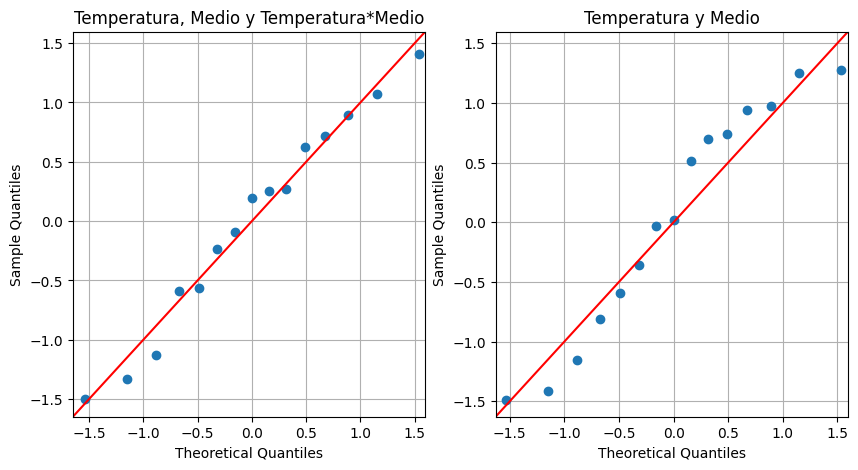

In [ ]:
#normalidad de los residuales

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10, 5)

for j in range(0,2):
  ax[j].set_title(labels[j])
  ax[j].grid()

  n, k = models[j].model.exog.shape
  k -= 1
  res = models[j].resid
  se = np.sqrt( np.sum(res ** 2) / (n - k - 1 ))
  std_res = res / se
        
  _fig = sm.qqplot(std_res, ax=ax[j], line="45")
        

In [ ]:
#Prueba shapiro
alpha = 0.05
i = 1

for model in models:
    print("Modelo ", i)
    i += 1
    s, p_val = stats.shapiro(model.resid)
    if p_val <= alpha:
        print("Rechazamos la hipósis nula: No hay normalidad\np_val ", p_val, "\n")
    else:
        print("No rechazamos la hipótesis nula: hay normalidad\np_val", p_val, "\n")
        

Modelo  1
No rechazamos la hipótesis nula: hay normalidad
p_val 0.7775682210922241 

Modelo  2
No rechazamos la hipótesis nula: hay normalidad
p_val 0.20921210944652557 



Haciendo un análisis gráfico y uno con la prueba Shapiro concluimos que los errores se distribuyen de manera normal

In [ ]:
#multicolinealidad
mic[['temperatura', 'medio', 'x1x2']].corr()

,temperatura,medio,x1x2
temperatura,1.000000,0.187271,0.464834
medio,0.187271,1.000000,0.935660
x1x2,0.464834,0.935660,1.000000


In [ ]:
mic[['temperatura', 'medio']].corr()

,temperatura,medio
temperatura,1.000000,0.187271
medio,0.187271,1.000000


Podemos observar que hay una alta correlación entre las variables de medio y $x_1x_2$, por lo que podemos descartar al modelo con dichas tres variables  debido a que tiene una $R^2$ ajustada menor que el otro modelo y debido a la multicolinealidad


De esta manera concluimos que se cumplen los supuestos, por lo que podemos elegir entre ambos modelos. Claramente tomaremos aquel con el valor de la $R^2$ ajustada mayor, el cual es el modelo que unicamente contempla la temperatura y el medio

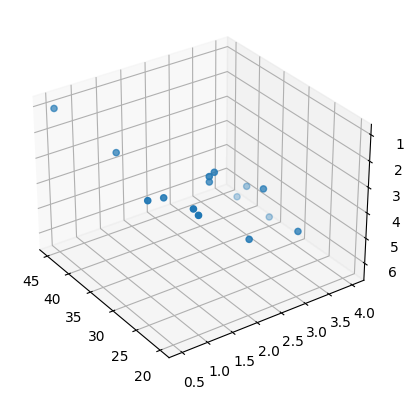

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(mic['temperatura'], mic['medio'], mic['log(cont)'], marker = 'o')
ax.view_init(-150,35)
plt.show()

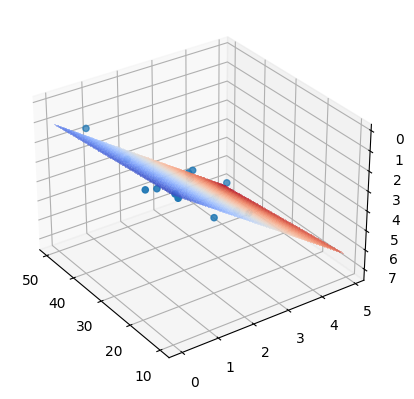

In [ ]:
coefs = [0.0202, 1.2395]

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

#temperatura
X = np.arange(10, 50, 0.25)

#medio
Y = np.arange(0, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = coefs[0]*X + coefs[1]*Y

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha = 0.4)
ax.scatter(mic['temperatura'], mic['medio'], mic['log(cont)'], marker = 'o')

ax.view_init(-150,35)
plt.show()

Concluimos que la hipótesis es cierta